In [294]:
from qiskit import *
from random import randrange
from qiskit_machine_learning.algorithms.classifiers import QSVC
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, SPSA
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals
from qiskit.primitives import Sampler 
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

data = [["red" if i >= 50 else "blue", [i*np.pi/1000]] for i in range(1,100)]
test = [["red" if i >= 50 else "blue", [i*np.pi/1000]] for i in [randrange(1,100) for x in range(1,20)]]

objective_func_vals = []

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

FeatureMap = QuantumCircuit(1)
x = Parameter('x')
FeatureMap.rx(x, 0)

Ansatz = QuantumCircuit(1)
theta1 = Parameter('theta1')
theta2 = Parameter('theta2')
theta3 = Parameter('theta3')

Ansatz.u(theta1, theta2, theta3, 0)

vqc = VQC(1, 
    feature_map=FeatureMap, 
    ansatz=Ansatz,     
    loss="cross_entropy",
    optimizer=SPSA(maxiter=40),
    callback=callback_graph,)


In [295]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

Y,X = zip(*data)
X = np.array(X)
Y = np.array(Y)
print (X[0])
YTest,XTest = zip(*test)
XTest = np.array(XTest)/np.linalg.norm(XTest)
YTest = np.array(YTest)


[0.00314159]


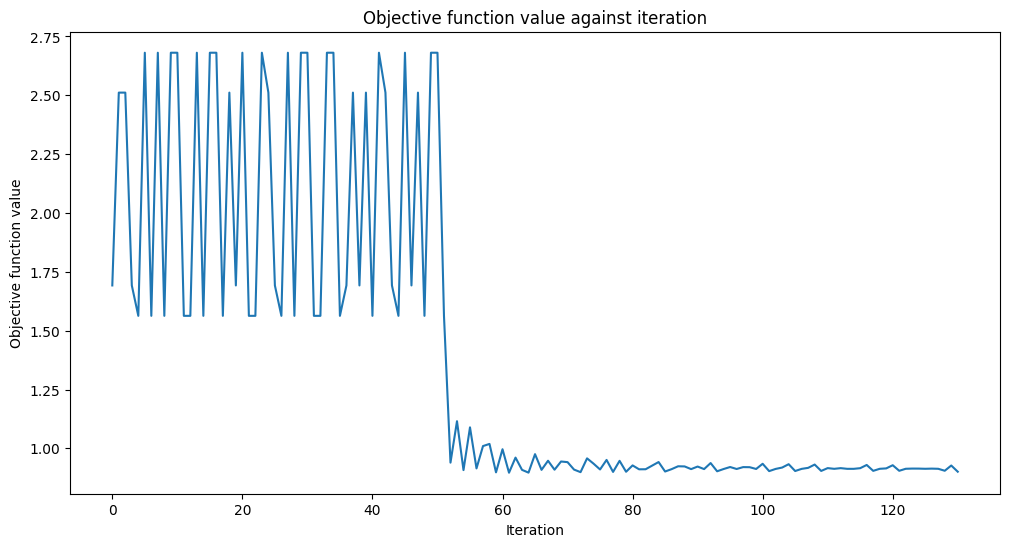

0.8947368421052632

In [296]:
# fit classifier to data
vqc.fit(X, Y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(XTest, YTest)

In [297]:
vqc.score(XTest, YTest)

0.8947368421052632